11501568/11490434 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               11

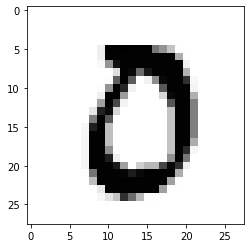

In [ ]:
import numpy as np                               # Import numpy library
import matplotlib.pyplot as plt                  # Import mathplot library
import datetime                                  # Import datetime library
from keras.datasets import mnist                 # Import MNIST dataset
from keras.models import Sequential              # Import Sequential class
from keras.layers import Conv2D, MaxPooling2D    # Import Conv2D, MaxPooling2D class
from keras.layers import Dense, Dropout, Flatten # Import Dense, Dropout, Flatten class
from keras.utils import np_utils                 # Import numpy-related utilities
from keras.callbacks import TensorBoard          # Import TensorBoard class
from keras.models import load_model              # Import load_model method
from tensorflow.keras.utils import plot_model    # Import plot_model method
from tensorflow.math import confusion_matrix     # Import confusion matrix method
# Import spare categorical crossentroy loss
from tensorflow.keras.metrics import categorical_crossentropy
batch_size = 128             # Number of samples per gradient update
num_classes = 10             # Number of classes in the dataset
epochs = 1                   # Number of epochs to train the model
img_rows, img_cols = 28, 28  # Image dimensions

# Load data
# x_train is a NumPy array of grayscale image data with shapes (60000, 28, 28)
# y_train is a NumPy array of digit labels (in range 0-9) with shape (60000,)
# x_test is a NumPy array of grayscale image data with shapes (10000, 28, 28)
# y_test is a NumPy array of digit labels (in range 0-9) with shape (10000,)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000,28,28,1) # Reshape the data to 4-dimension
x_test = x_test.reshape(10000,28,28,1)   # Reshape the data to 4-dimension

# There are 10 classes and classes are represented as unique integers
# To do so, transforming the integer into a 10 element binary vector with
# a 1 for the index of the class value, and 0 values for all other classes
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

model = Sequential() # Create a Sequential object
# Add a convolutional layer with 32 kernels, each of size 3x3
# Use ReLU activation function, padding="valid", strides=(1,1)
# Specify the input size to this convolutional layer: (28,28,1)
# Note: Input size needs to be specified for the first layer only
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
# Add another convolutional layer with 64 kernels, each of size 3x3
# Use ReLU activation function, padding="valid", strides=(1,1)
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
# Add a max pooling layer of size 2 x 2
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add a dropout layer to prevent a model from overfitting
model.add(Dropout(0.25))
# Add a flatten layer to convert the pooled data to a single column
# that is passed to the fully-connected layer
model.add(Flatten())
# Add a dense layer (fully-connected layer) and use ReLU activation function
model.add(Dense(units=128, activation='relu'))
# Add a dropout layer tpo prevent a model from overfitting
model.add(Dropout(0.5))
# Add a dense layer (fully-connected layer) and use Softmax activation function
model.add(Dense(units=num_classes, activation='softmax'))

model.summary()

plot_model(model, show_shapes=True,
           show_layer_names=True)

# Compile the model, i.e., configures the model for training
# Use crossentropy loss function since there are two or more label classes.
# Use adam algorithm (a stochastic gradient descent method)
# Use accuracy as metric, i.e., report on accuracy
model.compile(optimizer='adam', # Default learning rate is 0.001
              loss=categorical_crossentropy,              
              metrics=['accuracy'])

# Create TensorBoard object to track experiment metrics like loss and
# accuracy, visualizing the model graph, etc.
log_dir=".logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Fit the model, i.e., train the model
# Specify training data and labels
# Speicfy batch size, i.e., number of samples per gradient update
# Specify validation data, i.e., data on which to evaluate the loss
# Write TensorBoard logs after every batch of training to monitor our metrices
training_history = model.fit(x_train, y_train,
                             batch_size=batch_size,
                             epochs=epochs,
                             validation_data=(x_test, y_test),
                             callbacks=[tensorboard_callback]
)

# Evaluate the model
# Specify test data and labels
# Set verbose to 0, i.e., slient (no progress bar)
validation_loss, validation_accuracy = model.evaluate(x_test, y_test, verbose=0)
# Print loss and accuracy
print('Validation loss:', validation_loss)
print('Validation accuracy:', validation_accuracy)

model_name = 'digits_recognition_cnn.h5'
model.save(model_name, save_format='h5')

loaded_model = load_model(model_name)

image_index = (int)(input("Enter an image index: ")) # Get image index from user
# Show the image in greyscale
plt.imshow(x_test[image_index].reshape(28,28),cmap='Greys')

# Use the model to do prediction by specifying the image. 
# Get back a numpy array of prediction
prediction = loaded_model.predict(x_test[image_index].reshape(1,28,28,1))

# Print the predicted result, i.e., the one with maximum value
print('Predicted result:', prediction.argmax())